https://www.youtube.com/watch?v=-0qQ_ukDbl8

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os

In [2]:
# tensorflow 2버전
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

plt.style.use('dark_background')

In [3]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 7.5 MB/s 


In [4]:
from mtcnn.mtcnn import MTCNN

In [5]:
from google.colab.patches import cv2_imshow
from keras.preprocessing import image


# 단일불러오기

In [ ]:
img_data = image.load_img('/content/drive/MyDrive/final_project_team8/킥보드 탑승 예시사진/yes/KakaoTalk_Photo_2021-11-24-14-19-12 018.jpeg', target_size=(100,100))


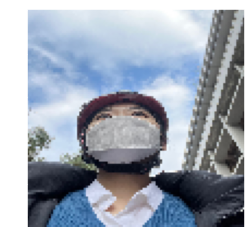

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img_data)
plt.show()

# 파일 디렉토리 불러오기


In [6]:
from keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/final_project_team8/킥보드 탑승 예시사진/',
    target_size=(100, 100),
    batch_size=1,
    class_mode='binary')

Found 163 images belonging to 2 classes.


In [ ]:
x_train, y_train = train_generator.next()

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FF34C6F0DD0>


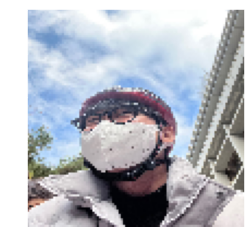

In [ ]:
print(img_data)
plt.imshow(x_train[0])
plt.show()

In [7]:
# path = '/content/drive/MyDrive/final_project_team8/킥보드 탑승 예시사진/yes/KakaoTalk_Photo_2021-11-24-14-19-43 023.jpeg'
path = '1.jpg'

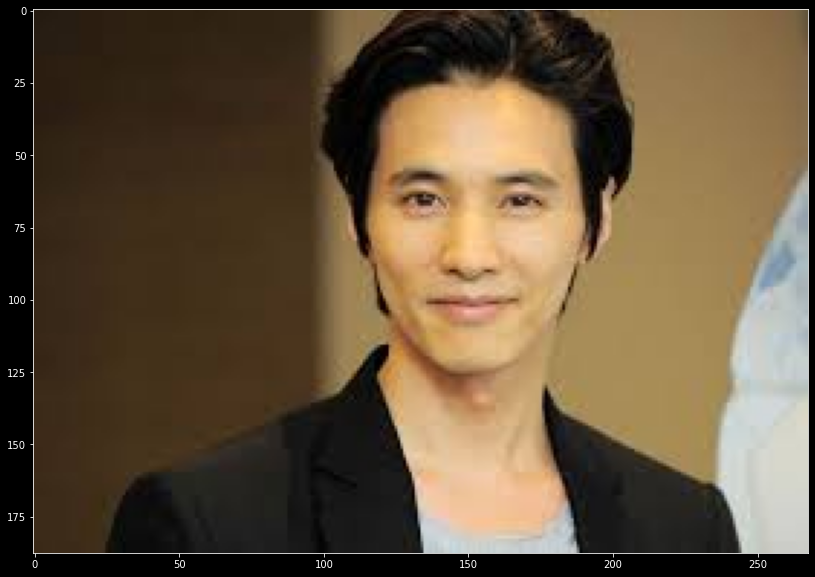

In [8]:
image = cv2.imread(path)

# 시각화
plt.figure(figsize=(16, 10))
# opencv -> BGR 로 읽히는걸 RGB로 바꿈
plt.imshow(image[:, :, ::-1])

In [9]:
detector = MTCNN()

face = detector.detect_faces(image)
for face in face:
  print(face)

{'box': [116, 29, 72, 94], 'confidence': 0.9999067783355713, 'keypoints': {'left_eye': (135, 66), 'right_eye': (168, 67), 'nose': (151, 88), 'mouth_left': (136, 101), 'mouth_right': (167, 101)}}


In [10]:
  def create_bbox(image):
    faces = detector.detect_faces(image)
    bounding_box = faces[0]['box']
    keypoints = faces[0]['keypoints']

    cv2.rectangle(image,
                  (bounding_box[0],bounding_box[1]),
                  (bounding_box[0]+bounding_box[2],bounding_box[1]+bounding_box[3]),
                  (0,155,255),2)

    cv2.circle(image,(keypoints['left_eye']),2,(0,155,255),2)
    cv2.circle(image,(keypoints['right_eye']),2,(0,155,255),2)
    cv2.circle(image,(keypoints['nose']),2,(0,155,255),2)
    cv2.circle(image,(keypoints['mouth_left']),2,(0,155,255),2)
    cv2.circle(image,(keypoints['mouth_right']),2,(0,155,255),2)

    return image

In [11]:
marked_image = create_bbox(image)

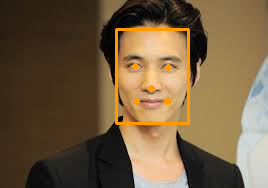

In [12]:
cv2_imshow(marked_image)

In [ ]:
#marked_image = create_bbox(cv2.imshow('1.jpg'))
#cv2_imshow(marked_image)

In [15]:
cv2.imwrite('/content/crop_1.jpg',marked_image)

True